In [12]:
import pandas as pd
import numpy as np
from DB_Manager import DatabaseManager
import plotly.express as px
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from Scaler import Scaler

def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-10)))

Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 673 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 672 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'main'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'main'.


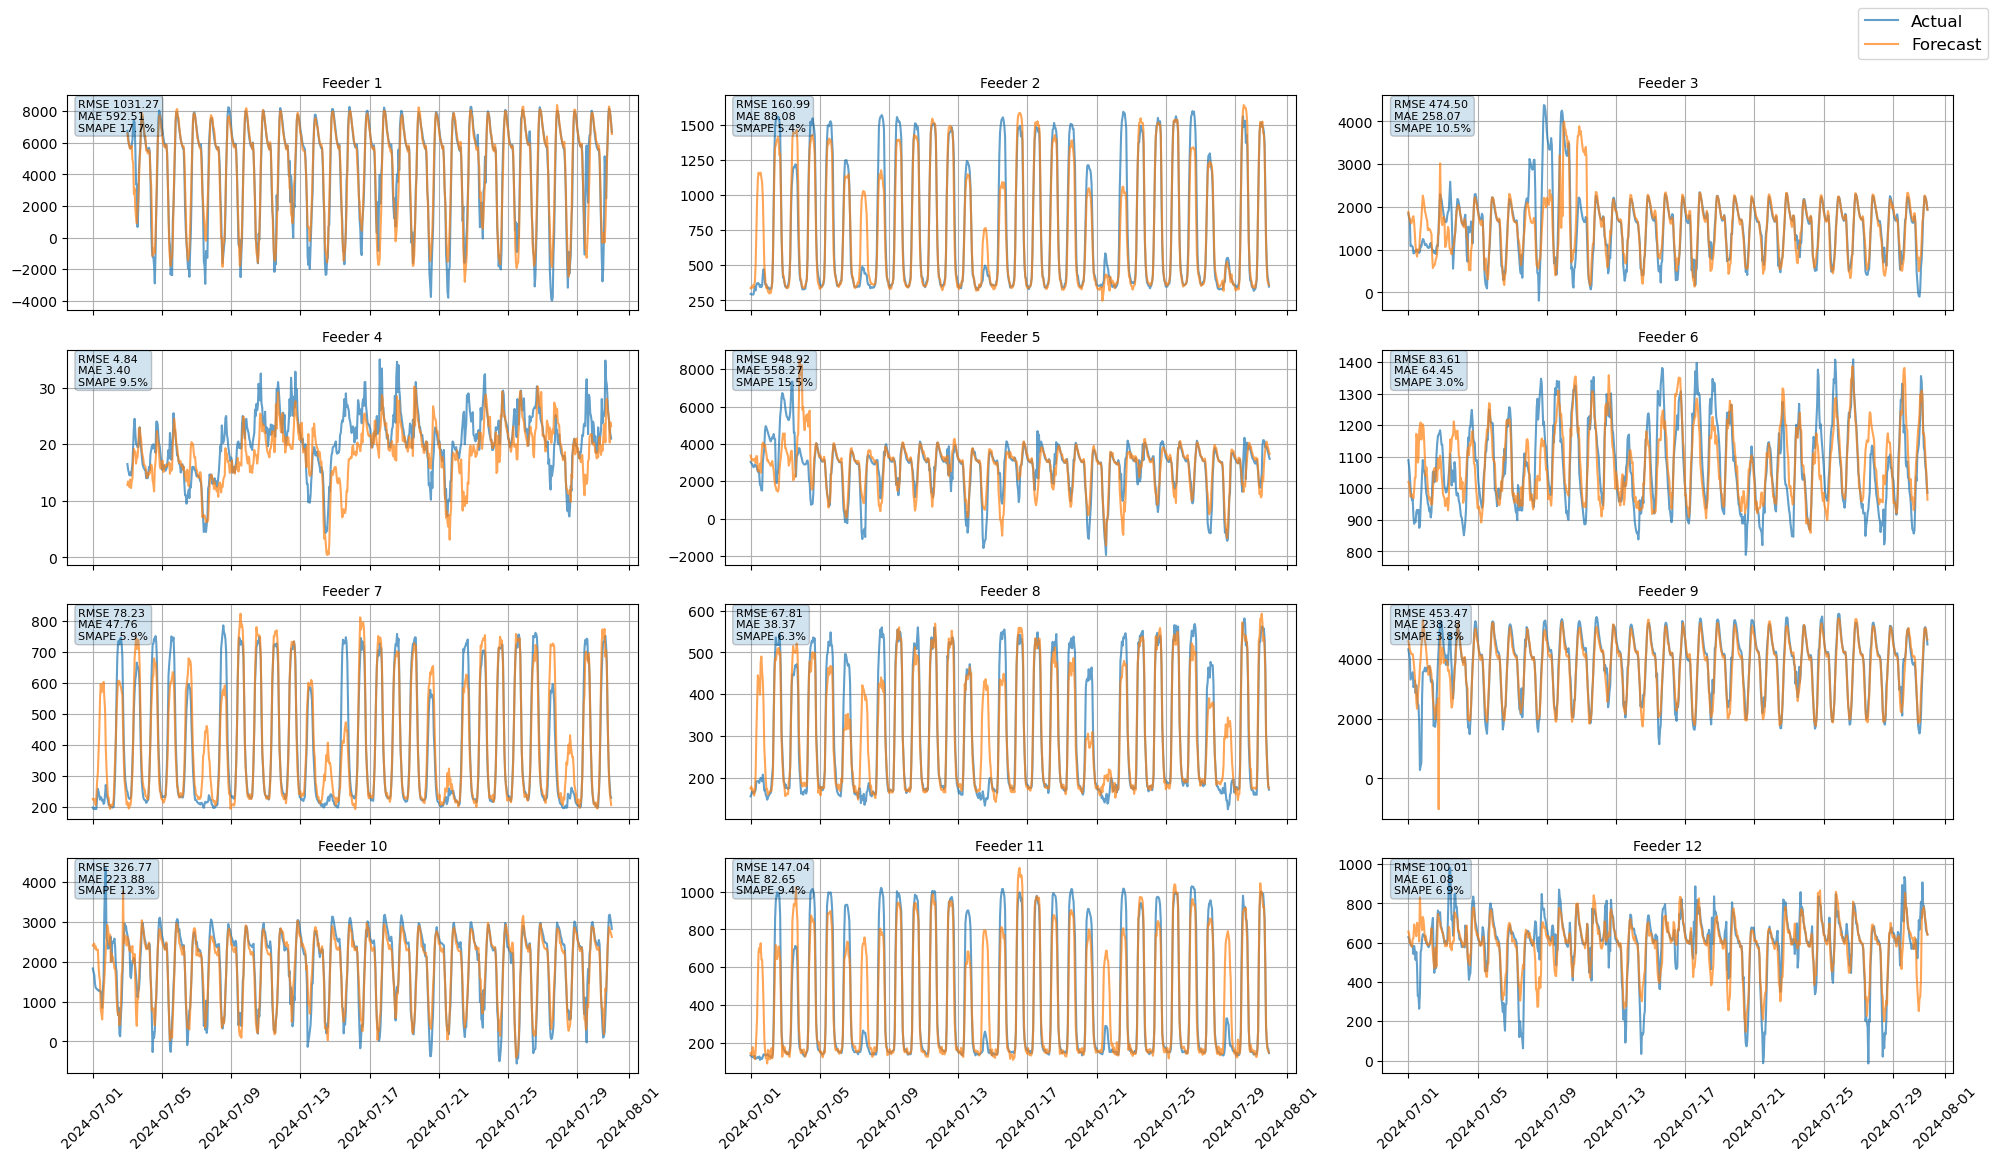

Feeder         RMSE         MAE      SMAPE
0        1  1031.267940  592.507928  17.663072
1        2   160.994202   88.081378   5.435969
2        3   474.500771  258.069535  10.483263
3        4     4.844645    3.398558   9.547045
4        5   948.917151  558.267337  15.503523
5        6    83.613559   64.448461   2.991633
6        7    78.232288   47.758833   5.872806
7        8    67.811856   38.369515   6.316858
8        9   453.469957  238.280515   3.764832
9       10   326.773022  223.879620  12.315897
10      11   147.035261   82.647193   9.440470
11      12   100.012455   61.083779   6.934777

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from your_database_module import DatabaseManager
# from your_metrics_module import root_mean_squared_error, mean_absolute_error, smape

tag        = 'main'
version    = 'v1.6_Fresh_Testing_6'
scenario   = '24hr'
arch       = 'LSTM'
start_date = "2024-07-01"
end_date   = "2024-07-31"
TRAIN_START_DATE = "2024-01-01 00:00:00+00"
TRAIN_END_DATE   = "2024-05-31 23:59:59+00"
metrics = []
# create a 4×3 grid of subplots, sharing axes for easy comparison
fig, axes = plt.subplots(4, 3, 
                         figsize=(20, 12), 
                         sharex=True, 
                         sharey=False)

for ax, feeder_id in zip(axes.flatten(), range(1, 13)):
    db = DatabaseManager(tag=tag)
    scaler = Scaler(feeder_id=feeder_id, scenario_type=scenario,
                    train_start_date=TRAIN_START_DATE,
                    train_end_date=TRAIN_END_DATE)
    
    results = db.load_forecasts(
        feeder_id, version, scenario, arch, 
        start_date, end_date, tag=tag
    )[['actual_value', 'forecast_value']]
    
    # compute metrics
    rmse = root_mean_squared_error(
        results['actual_value'], results['forecast_value']
    )
    mae  = mean_absolute_error(
        results['actual_value'], results['forecast_value']
    )
    sm   = smape(
        results['actual_value'], results['forecast_value']
    )
    
    # plot
    ax.plot(results.index, results['actual_value'], 
            label='Actual',   alpha=0.7)
    ax.plot(results.index, results['forecast_value'], 
            label='Forecast', alpha=0.7)
    
    # rotate x-labels by 45°
    ax.tick_params(axis='x', rotation=45)
    
    # title & metrics box
    ax.set_title(f"Feeder {feeder_id}", fontsize=10)
    ax.text(0.02, 0.98,
            f"RMSE {rmse:.2f}\nMAE {mae:.2f}\nSMAPE {sm:.1f}%",
            transform=ax.transAxes,
            va='top', ha='left',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))
    
    ax.grid(True)
    
    metrics.append({
        'Feeder': feeder_id,
        'RMSE': rmse,
        'MAE': mae,
        'SMAPE': sm
    })
    
    results.to_csv(f"Forecasts/LSTM/Feeder_{feeder_id}_LSTM.csv", index=True)

# one shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

metrics_df = pd.DataFrame(metrics)
metrics_df

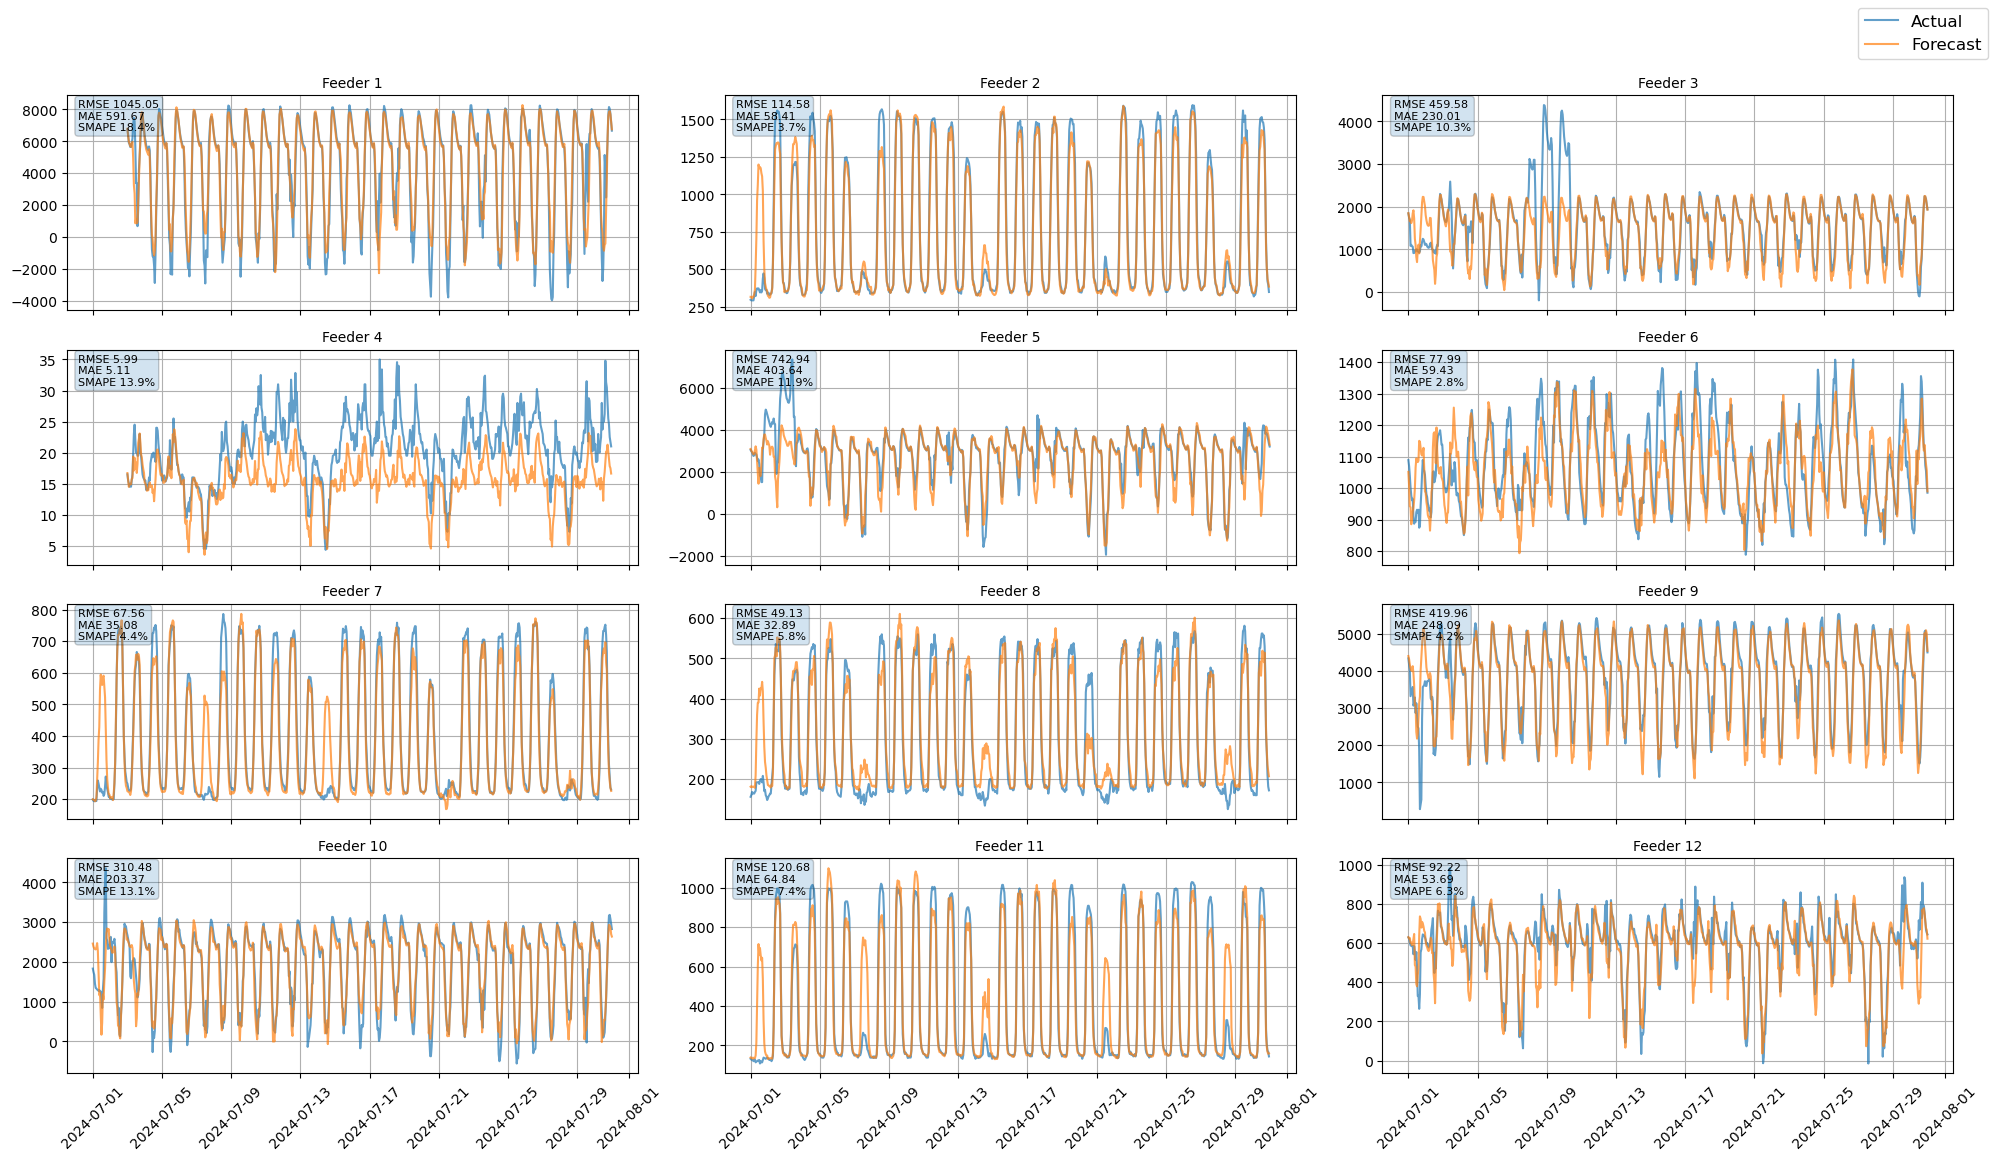

Feeder         RMSE         MAE      SMAPE
0        1  1045.052644  591.669000  18.444639
1        2   114.581028   58.411502   3.667194
2        3   459.577989  230.012713  10.306781
3        4     5.990552    5.109853  13.888665
4        5   742.942021  403.639917  11.889821
5        6    77.993861   59.431661   2.750824
6        7    67.561954   35.075813   4.434434
7        8    49.125320   32.886159   5.835350
8        9   419.957366  248.093721   4.244641
9       10   310.475754  203.370474  13.077604
10      11   120.678433   64.839617   7.407030
11      12    92.222966   53.694696   6.314015

In [51]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from your_database_module import DatabaseManager
# from your_metrics_module import root_mean_squared_error, mean_absolute_error, smape

tag        = 'exp_LightGBM'
version    = 'v1.6_Fresh_Testing_6'
scenario   = '24hr'
arch       = 'LightGBM'
start_date = "2024-07-01"
end_date   = "2024-07-31"
TRAIN_START_DATE = "2024-01-01 00:00:00+00"
TRAIN_END_DATE   = "2024-05-31 23:59:59+00"
metrics = []
# create a 4×3 grid of subplots, sharing axes for easy comparison
fig, axes = plt.subplots(4, 3, 
                         figsize=(20, 12), 
                         sharex=True, 
                         sharey=False)

for ax, feeder_id in zip(axes.flatten(), range(1, 13)):
    db = DatabaseManager(tag=tag)
    
    # results = db.load_forecasts(
    #     feeder_id, version, scenario, arch, 
    #     start_date, end_date, tag=tag
    # )[['forecast_value']]
    
    # actuals = pd.read_csv(f"Forecasts/LSTM/Feeder_{feeder_id}_LSTM.csv", index_col=0, usecols=['actual_value'], parse_dates=True)
    actuals = pd.read_csv(f"Forecasts/LSTM/Feeder_{feeder_id}_LSTM.csv", index_col=0, parse_dates=True)[['actual_value']]
    forecasts = pd.read_csv(f"Forecasts/LightGBM/Feeder_{feeder_id}_LightGBM.csv", index_col=0, parse_dates=True)[['forecast_value']]
    # forecasts = pd.read_csv(f"Forecasts/LightGBM/Feeder_{feeder_id}_LightGBM.csv", index_col=0, usecols=['forecast_value'], parse_dates=True)
    
    results = pd.concat([actuals, forecasts], axis=1)    
    
    
    # results.to_csv(f"Forecasts/LightGBM/Feeder_{feeder_id}_LightGBM.csv", index=True)
    
    # compute metrics
    rmse = root_mean_squared_error(
        results['actual_value'], results['forecast_value']
    )
    mae  = mean_absolute_error(
        results['actual_value'], results['forecast_value']
    )
    sm   = smape(
        results['actual_value'], results['forecast_value']
    )
    
    # plot
    ax.plot(results.index, results['actual_value'], 
            label='Actual',   alpha=0.7)
    ax.plot(results.index, results['forecast_value'], 
            label='Forecast', alpha=0.7)
    
    # rotate x-labels by 45°
    ax.tick_params(axis='x', rotation=45)
    
    # title & metrics box
    ax.set_title(f"Feeder {feeder_id}", fontsize=10)
    ax.text(0.02, 0.98,
            f"RMSE {rmse:.2f}\nMAE {mae:.2f}\nSMAPE {sm:.1f}%",
            transform=ax.transAxes,
            va='top', ha='left',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))
    
    ax.grid(True)
    
    metrics.append({
        'Feeder': feeder_id,
        'RMSE': rmse,
        'MAE': mae,
        'SMAPE': sm
    })

# one shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

metrics_df = pd.DataFrame(metrics)
metrics_df

Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 673 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 672 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'exp_ANN'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entr

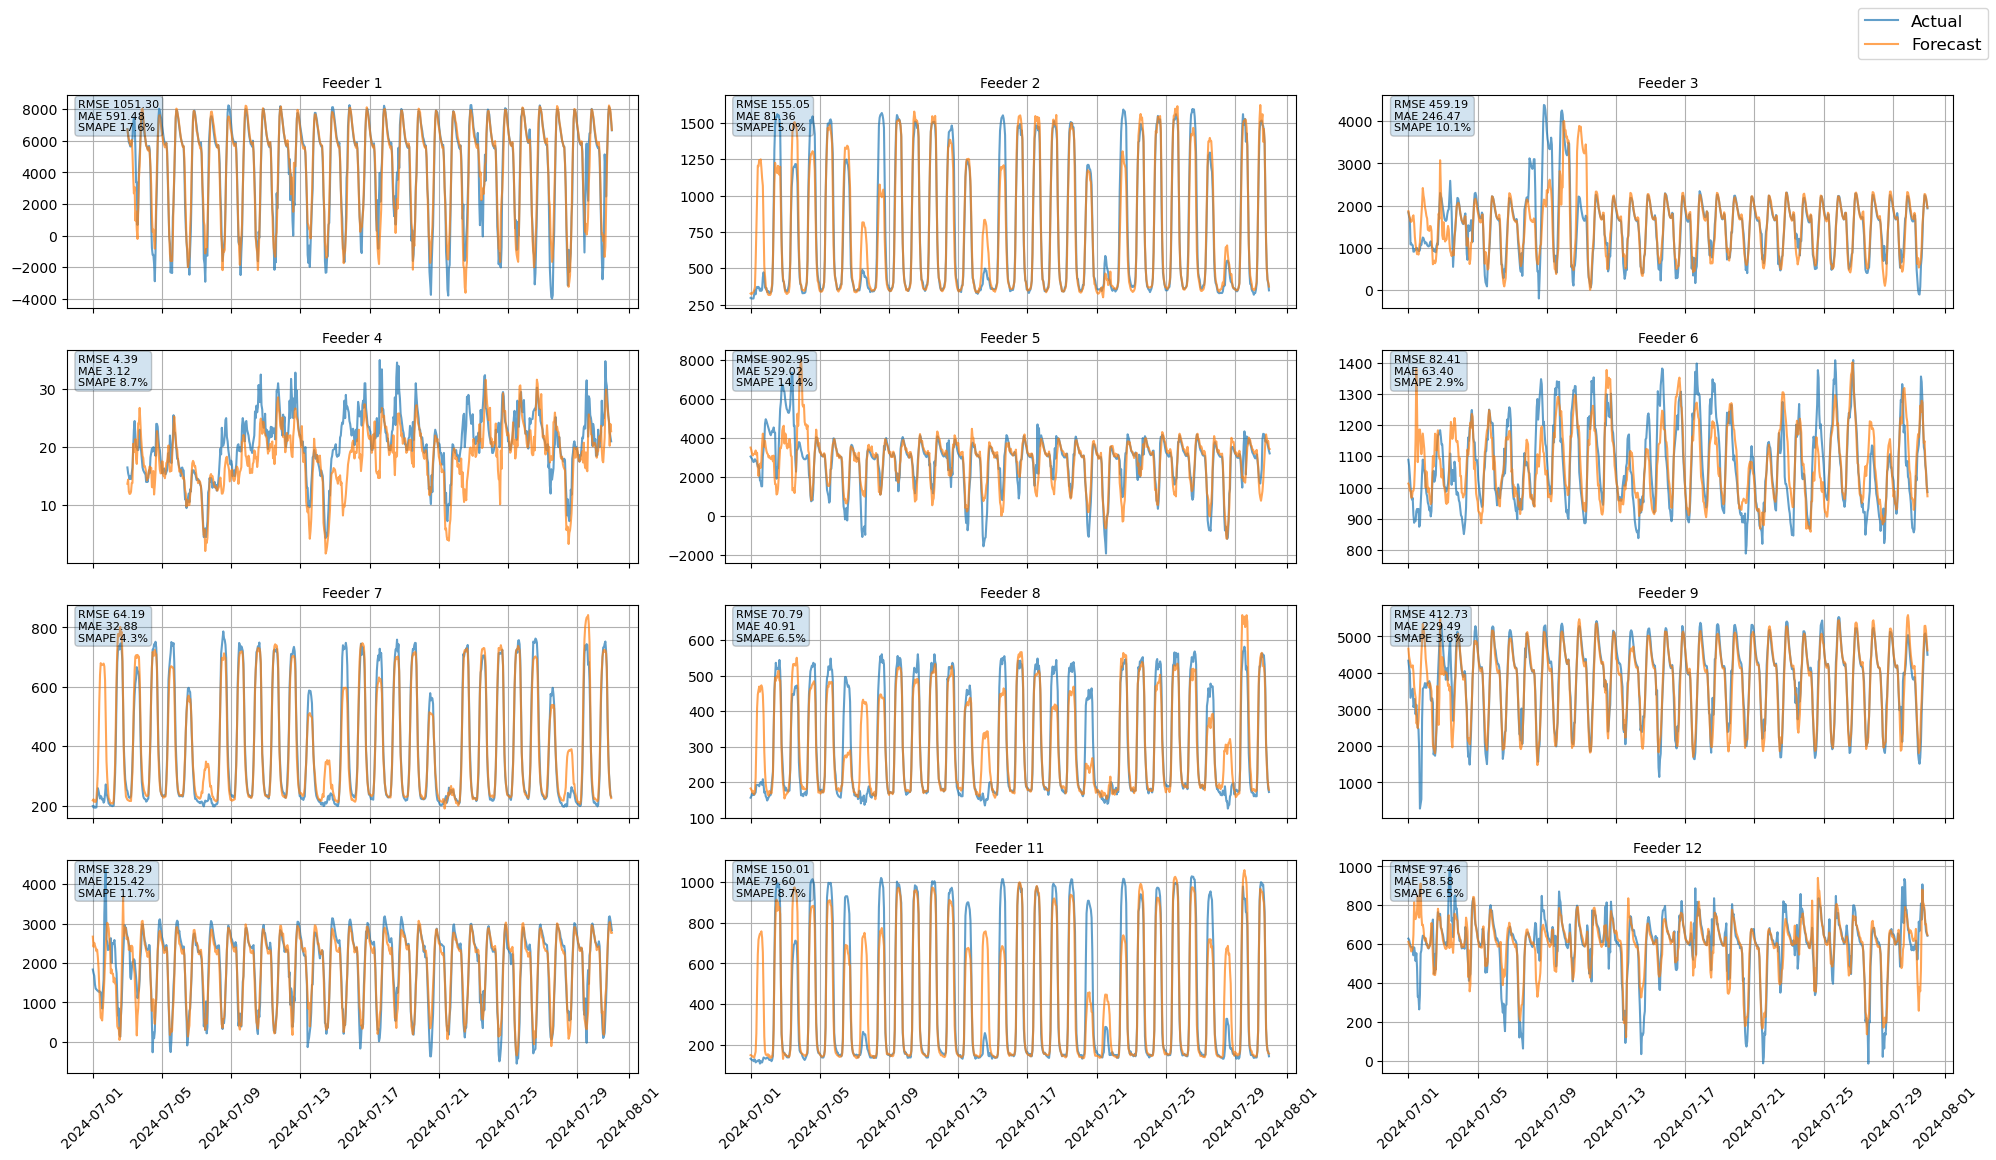

Feeder         RMSE         MAE      SMAPE
0        1  1051.301488  591.481102  17.605474
1        2   155.046089   81.360496   5.010457
2        3   459.194726  246.468696  10.090199
3        4     4.389862    3.116146   8.711393
4        5   902.952547  529.021031  14.389781
5        6    82.414546   63.395502   2.931112
6        7    64.185982   32.882266   4.250011
7        8    70.789307   40.910476   6.533672
8        9   412.731198  229.486831   3.646749
9       10   328.288795  215.420550  11.749555
10      11   150.006337   79.604124   8.654750
11      12    97.457611   58.581834   6.465517

In [53]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from your_database_module import DatabaseManager
# from your_metrics_module import root_mean_squared_error, mean_absolute_error, smape

tag        = 'exp_ANN'
version    = 'v1.6_Fresh_Testing_6'
scenario   = '24hr'
arch       = 'ANN'
start_date = "2024-07-01"
end_date   = "2024-07-31"
TRAIN_START_DATE = "2024-01-01 00:00:00+00"
TRAIN_END_DATE   = "2024-05-31 23:59:59+00"
metrics = []
# create a 4×3 grid of subplots, sharing axes for easy comparison
fig, axes = plt.subplots(4, 3, 
                         figsize=(20, 12), 
                         sharex=True, 
                         sharey=False)

for ax, feeder_id in zip(axes.flatten(), range(1, 13)):
    db = DatabaseManager(tag=tag)
    scaler = Scaler(feeder_id=feeder_id, scenario_type=scenario,
                    train_start_date=TRAIN_START_DATE,
                    train_end_date=TRAIN_END_DATE)
    
    results = db.load_forecasts(
        feeder_id, version, scenario, arch, 
        start_date, end_date, tag=tag
    )[['actual_value', 'forecast_value']]
    
    # compute metrics
    rmse = root_mean_squared_error(
        results['actual_value'], results['forecast_value']
    )
    mae  = mean_absolute_error(
        results['actual_value'], results['forecast_value']
    )
    sm   = smape(
        results['actual_value'], results['forecast_value']
    )
    
    # plot
    ax.plot(results.index, results['actual_value'], 
            label='Actual',   alpha=0.7)
    ax.plot(results.index, results['forecast_value'], 
            label='Forecast', alpha=0.7)
    
    # rotate x-labels by 45°
    ax.tick_params(axis='x', rotation=45)
    
    # title & metrics box
    ax.set_title(f"Feeder {feeder_id}", fontsize=10)
    ax.text(0.02, 0.98,
            f"RMSE {rmse:.2f}\nMAE {mae:.2f}\nSMAPE {sm:.1f}%",
            transform=ax.transAxes,
            va='top', ha='left',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))
    
    ax.grid(True)
    
    metrics.append({
        'Feeder': feeder_id,
        'RMSE': rmse,
        'MAE': mae,
        'SMAPE': sm
    })
    
    results.to_csv(f"Forecasts/ANN/Feeder_{feeder_id}_ANN.csv", index=True)

# one shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

metrics_df = pd.DataFrame(metrics)
metrics_df

Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 673 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 672 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 721 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries with tag 'exp_HP'.
Train start date: 2024-01-01 00:00:00+00
Train end date: 2024-05-31 23:59:59+00
Loaded 720 forecast entries wit

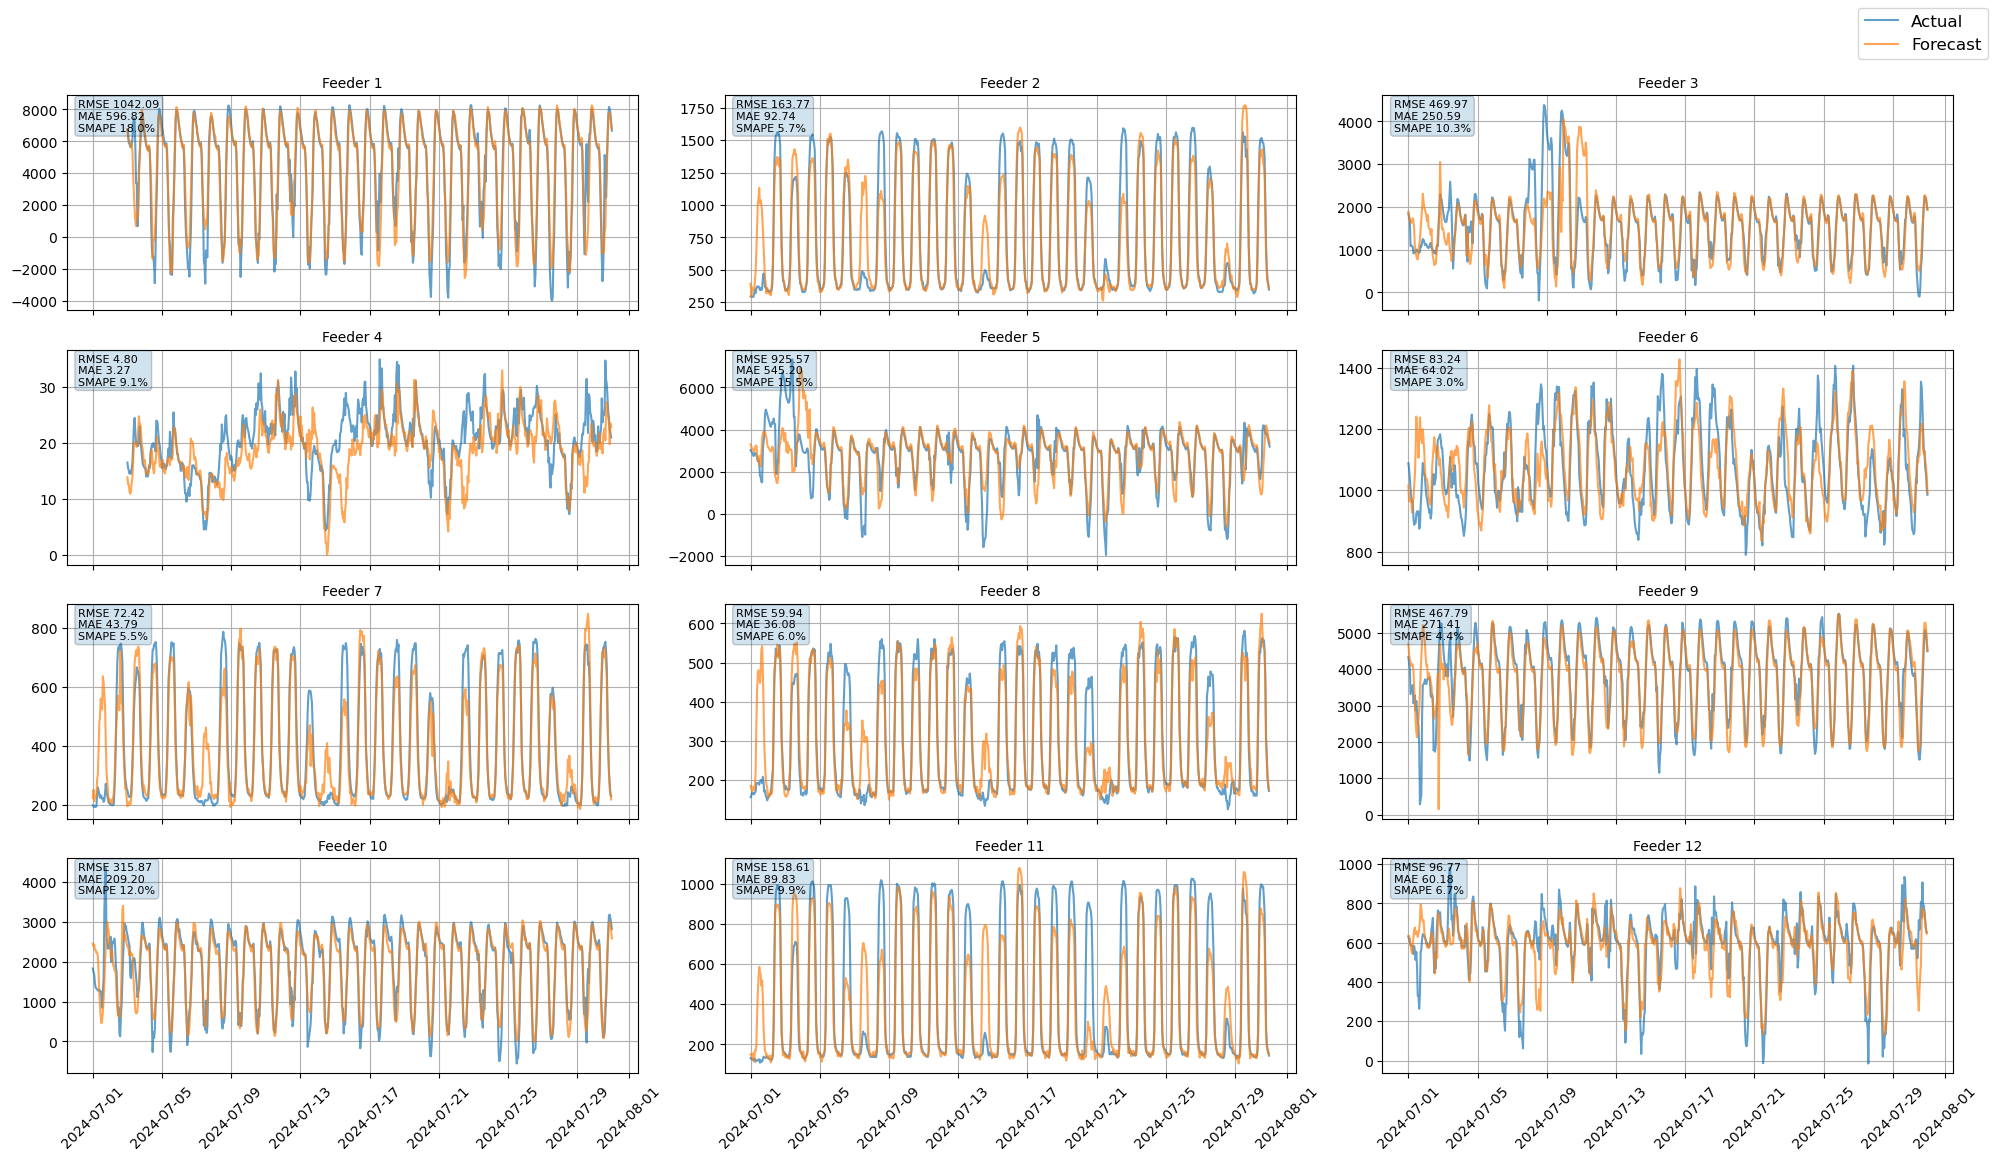

Feeder         RMSE         MAE      SMAPE
0        1  1042.090067  596.818854  18.005191
1        2   163.766761   92.740641   5.723967
2        3   469.972467  250.588973  10.347266
3        4     4.796592    3.272022   9.079432
4        5   925.566524  545.203798  15.508938
5        6    83.242265   64.021785   2.961176
6        7    72.415282   43.789225   5.500891
7        8    59.940247   36.076170   5.981109
8        9   467.794961  271.412854   4.378560
9       10   315.874166  209.202725  11.985030
10      11   158.607415   89.829194   9.860664
11      12    96.769838   60.176951   6.670161

In [55]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from your_database_module import DatabaseManager
# from your_metrics_module import root_mean_squared_error, mean_absolute_error, smape

tag        = 'exp_HP'
version    = 'v1.7_HP_Tuning_1'
scenario   = '24hr'
arch       = 'LSTM'
start_date = "2024-07-01"
end_date   = "2024-07-31"
TRAIN_START_DATE = "2024-01-01 00:00:00+00"
TRAIN_END_DATE   = "2024-05-31 23:59:59+00"
metrics = []
# create a 4×3 grid of subplots, sharing axes for easy comparison
fig, axes = plt.subplots(4, 3, 
                         figsize=(20, 12), 
                         sharex=True, 
                         sharey=False)

for ax, feeder_id in zip(axes.flatten(), range(1, 13)):
    db = DatabaseManager(tag=tag)
    scaler = Scaler(feeder_id=feeder_id, scenario_type=scenario,
                    train_start_date=TRAIN_START_DATE,
                    train_end_date=TRAIN_END_DATE)
    
    results = db.load_forecasts(
        feeder_id, version, scenario, arch, 
        start_date, end_date, tag=tag
    )[['actual_value', 'forecast_value']]
    
    # compute metrics
    rmse = root_mean_squared_error(
        results['actual_value'], results['forecast_value']
    )
    mae  = mean_absolute_error(
        results['actual_value'], results['forecast_value']
    )
    sm   = smape(
        results['actual_value'], results['forecast_value']
    )
    
    # plot
    ax.plot(results.index, results['actual_value'], 
            label='Actual',   alpha=0.7)
    ax.plot(results.index, results['forecast_value'], 
            label='Forecast', alpha=0.7)
    
    # rotate x-labels by 45°
    ax.tick_params(axis='x', rotation=45)
    
    # title & metrics box
    ax.set_title(f"Feeder {feeder_id}", fontsize=10)
    ax.text(0.02, 0.98,
            f"RMSE {rmse:.2f}\nMAE {mae:.2f}\nSMAPE {sm:.1f}%",
            transform=ax.transAxes,
            va='top', ha='left',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))
    
    ax.grid(True)
    
    metrics.append({
        'Feeder': feeder_id,
        'RMSE': rmse,
        'MAE': mae,
        'SMAPE': sm
    })
    
    results.to_csv(f"Forecasts/ANN/Feeder_{feeder_id}_ANN.csv", index=True)

# one shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

metrics_df = pd.DataFrame(metrics)
metrics_df